In [13]:
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [14]:
# 1. Set paths & parameters
base_dir = r"D:\target\AI-AGENTS\accident_detection_ai\severity_data"
img_size = (224, 224)
batch_size = 16
epochs = 20
num_classes = 3  # minor, major, critical


In [15]:
# 2. Data generators (80% train, 20% val)
train_datagen = ImageDataGenerator(
    rescale=1/255.0,
    validation_split=0.2,
    horizontal_flip=True,
    rotation_range=15,
    zoom_range=0.1
)

train_gen = train_datagen.flow_from_directory(
    base_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="training",
    shuffle=True
)

val_gen = train_datagen.flow_from_directory(
    base_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation",
    shuffle=False
)


Found 128 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


In [16]:
# 3. Build a simple CNN
model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(img_size[0], img_size[1], 3)),
    MaxPooling2D(),
    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D(),
    Conv2D(128, (3,3), activation="relu"),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(num_classes, activation="softmax")
])

model.compile(
    optimizer=Adam(1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,347 (42.61 MB)

 Trainable params: 11,169,347 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# 4. Train
history = model.fit(
    train_gen,
    epochs=epochs,
    validation_data=val_gen
)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 733ms/step - accuracy: 0.3795 - loss: 1.1123 - val_accuracy: 0.4667 - val_loss: 1.1166
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 641ms/step - accuracy: 0.4274 - loss: 1.1283 - val_accuracy: 0.3667 - val_loss: 1.0489
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 620ms/step - accuracy: 0.3309 - loss: 1.1066 - val_accuracy: 0.5000 - val_loss: 1.0329
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 619ms/step - accuracy: 0.4678 - loss: 1.0336 - val_accuracy: 0.4667 - val_loss: 1.0473
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 632ms/step - accuracy: 0.4723 - loss: 1.0344 - val_accuracy: 0.4667 - val_loss: 1.0543
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 680ms/step - accuracy: 0.4986 - loss: 0.9968 - val_accuracy: 0.7000 - val_loss: 1.0321
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 618ms/step - accuracy: 0.5718 - loss: 0.9948 - val_accuracy: 0.6000 - val_loss: 1.0139
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 628ms/step - accuracy: 0.5365 - loss: 0.9811 - val_accuracy: 0.4667 - val_loss:

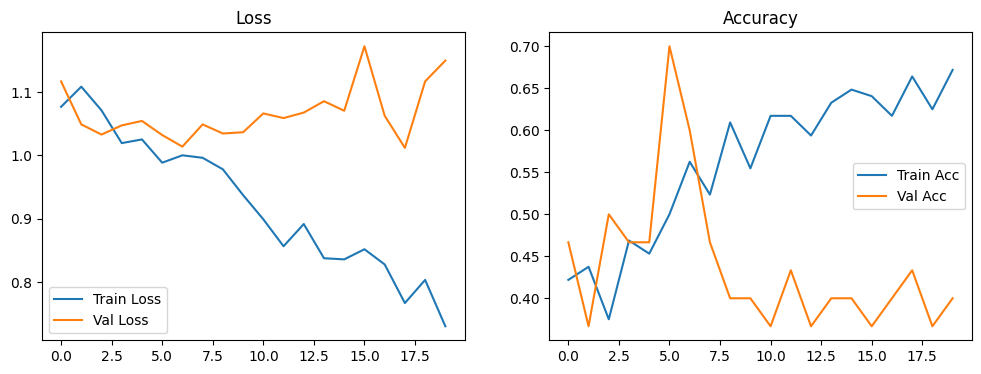

In [18]:

# 5. Plot loss & accuracy
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend(); plt.title("Loss")

plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.legend(); plt.title("Accuracy")

plt.show()


In [19]:
# 6. Save the model
os.makedirs(r"D:\target\AI-AGENTS\accident_detection_ai\models", exist_ok=True)
model.save("models/severity_model.h5")
print("Saved severity_model.h5 to models/")

Saved severity_model.h5 to models/
